In [1]:
my_list = [3, 2, 5]
sorted(my_list)

[2, 3, 5]

# Listing 3.1 All-ones or all-zeros tensors

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


# Listing 3.2 Random Tensors

In [2]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.3897554 ]
 [-1.8581074 ]
 [-0.13673945]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.01080263]
 [0.42258883]
 [0.39823747]], shape=(3, 1), dtype=float32)


# Listing 3.3 NumPy arrays are assignable

In [14]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0.

# Listing 3.4 TensorFlow tensors are not assignable

In [5]:
x = tf.ones(shape=(2, 2))
x[0,0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

# Listing 3.5 Creating a TensorFlow variable

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.3490097 ],
       [ 0.44136307],
       [-1.2597609 ]], dtype=float32)>


# Listing 3.6 Assigning a value to a TensorFlow variable

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

# Listing 3.7 Assigning a value to a subset of a TensorFlow variable

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

# Listing 3.8 Using `assign_add()`

In [10]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

# Listing 3.9 A few basic math operations

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

# Listing 3.10 Using the `GradientTape`

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

# Listing 3.11 Using `GradientTape` with constant tensor inputs

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

# Listing 3.12 Using nested gradient tapes to compute second-order gradients

Now you know about tensors, variables and tensor operations and you know how to compute gradients. This is enough to build any machine learning model based on gradient descent.

In [12]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# Listing 3.13 Generating two classes of random points in a 2D plane

In [15]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

# Listing 3.14 Stacking the two classes into an array with shape (2000, 2)

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Listing 3.15 Generating the corresponding targets (0 and 1)

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# Listing 3.16 Plotting the two point classes

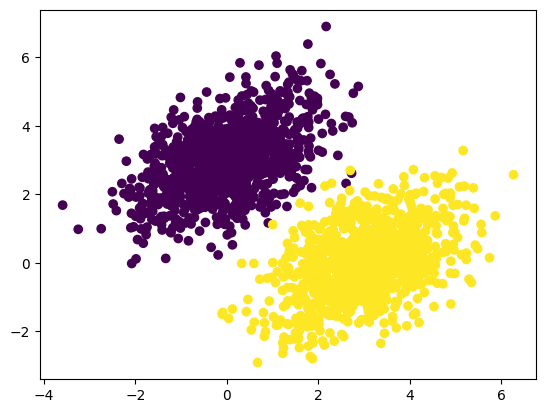

In [28]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# Listing 3.17 Creating the linear classifier variables

In [20]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Listing 3.18 The forward pass function

In [32]:
def model(inputs):
  return tf.matmul(inputs, W) + b

# Listing 3.19 The mean squared error loss function

In [29]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

# Listing 3.20 The training step function

In [30]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

# Listing 3.21 The batch training loop

Loss at step 0: 0.0262
Loss at step 1: 0.0262
Loss at step 2: 0.0262
Loss at step 3: 0.0262
Loss at step 4: 0.0262
Loss at step 5: 0.0262
Loss at step 6: 0.0262
Loss at step 7: 0.0262
Loss at step 8: 0.0262
Loss at step 9: 0.0262
Loss at step 10: 0.0262
Loss at step 11: 0.0262
Loss at step 12: 0.0262
Loss at step 13: 0.0262
Loss at step 14: 0.0261
Loss at step 15: 0.0261
Loss at step 16: 0.0261
Loss at step 17: 0.0261
Loss at step 18: 0.0261
Loss at step 19: 0.0261
Loss at step 20: 0.0261
Loss at step 21: 0.0261
Loss at step 22: 0.0261
Loss at step 23: 0.0261
Loss at step 24: 0.0261
Loss at step 25: 0.0261
Loss at step 26: 0.0261
Loss at step 27: 0.0261
Loss at step 28: 0.0261
Loss at step 29: 0.0261
Loss at step 30: 0.0261
Loss at step 31: 0.0261
Loss at step 32: 0.0261
Loss at step 33: 0.0261
Loss at step 34: 0.0261
Loss at step 35: 0.0261
Loss at step 36: 0.0261
Loss at step 37: 0.0261
Loss at step 38: 0.0261
Loss at step 39: 0.0261


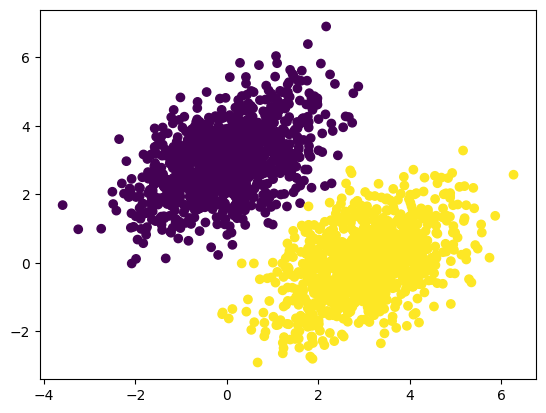

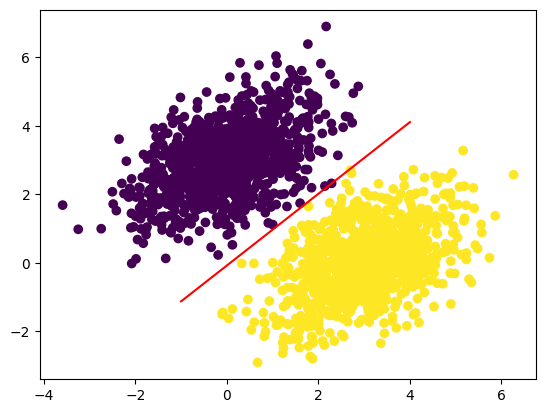

In [35]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

# plot model's predictions on the training inputs
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# our model, visualized as a line
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# Listing 3.22 A Dense layer implemented as a Layer subclass


In [19]:
from tensorflow import keras
import tensorflow as tf

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [20]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [21]:
# When using Keras, you don't have to worry about size compatibility most of the
# time, because the layers you add to your models are dynamically built to match
# the shape of the incoming layer.
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [22]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["accuracy"])

# Listing 3.23 Calling `fit()` with NumPy data

In [24]:
history = model.fit(inputs, targets, epochs=5, batch_size=128)
history.history

Epoch 1/5
16/16 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.6435
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6520
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.6690
Epoch 4/5
16/16 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.6885
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.7015


{'loss': [0.7712062001228333,
  0.674746572971344,
  0.5879043936729431,
  0.5097733736038208,
  0.4410325288772583],
 'accuracy': [0.6434999704360962,
  0.6520000100135803,
  0.6690000295639038,
  0.6884999871253967,
  0.7014999985694885]}

# Listing 3.24 Using the `validation_data` argument

In [29]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
print(loss_and_metrics)

Epoch 1/5
88/88 [==============================] - 2s 12ms/step - loss: 0.4064 - binary_accuracy: 0.9129 - val_loss: 0.0332 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0719 - binary_accuracy: 0.9564 - val_loss: 0.2108 - val_binary_accuracy: 0.8167
Epoch 3/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0773 - binary_accuracy: 0.9486 - val_loss: 0.1467 - val_binary_accuracy: 0.9217
Epoch 4/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0745 - binary_accuracy: 0.9564 - val_loss: 0.0418 - val_binary_accuracy: 0.9950
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0260 - binary_accuracy: 0.9983
[0.026035405695438385, 0.9983333349227905]


In [30]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 3ms/step
[[ 0.0838975 ]
 [ 0.84821093]
 [ 0.41135544]
 [ 1.0645845 ]
 [ 0.91411024]
 [ 0.97204   ]
 [-0.03641772]
 [ 1.1270711 ]
 [ 1.0107777 ]
 [ 0.2553392 ]]
